In [56]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import os
from models.AE import AE
from utils.loaders import load_data, load_model

In [14]:
FOLDER = 'saves'

In [15]:
(x_train, y_train), (x_test, y_test) = load_data()

In [16]:
ae = load_model(AE, FOLDER)

1/1 [==============================] - 0s 14ms/step


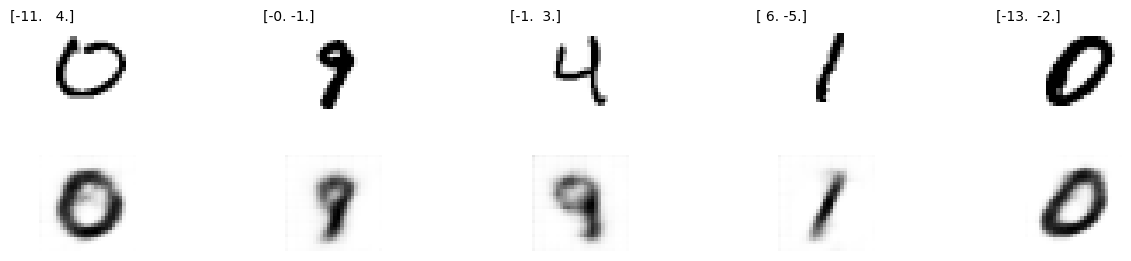

In [108]:
n_to_show = 5
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = ae.encoder.predict(example_images)

reconst_images = ae.decoder.predict(z_points)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i]+1)), fontsize=10, ha='center')
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()[:,:,0]
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')